In [1]:
#pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import ggplot, aes, geom_count ,geom_violin ,geom_tile,scale_fill_gradient2
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
#from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix as cm, f1_score, roc_auc_score ,classification_report
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# Import data

In [3]:
sample_sub = pd.read_csv('sample_submission.csv')
bank_train_data = pd.read_csv('train.csv')
bank_test_data = pd.read_csv('test.csv')

In [4]:
bank_train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Explore data

In [5]:
bank_train_data.shape

(165034, 14)

In [6]:
bank_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
exited_cat = [ str(x) for x in bank_train_data['Exited']]
bank_train_data['Exited_cat'] = exited_cat

In [8]:
bank_train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Exited_cat         0
dtype: int64

In [9]:
num_col = ['CreditScore','Age','Tenure','Balance',
           'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

In [10]:
bank_train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


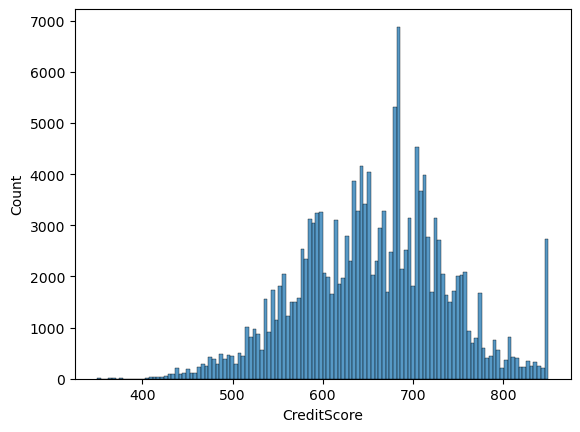

In [11]:
sns.histplot(data=bank_train_data,x="CreditScore")
plt.show()

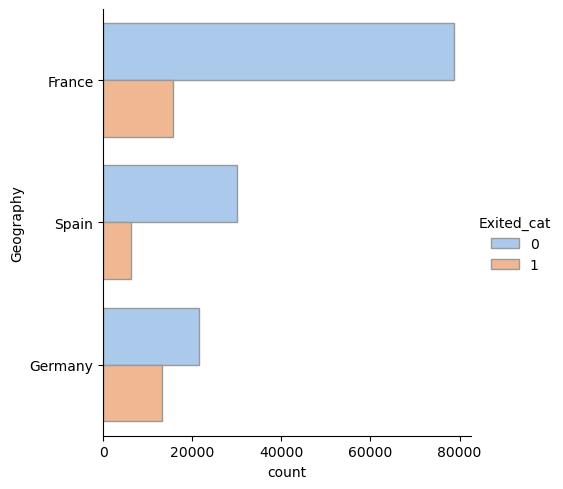

In [12]:
sns.catplot(y="Geography", hue="Exited_cat", kind="count",
            palette="pastel", edgecolor=".6",
            data=bank_train_data)

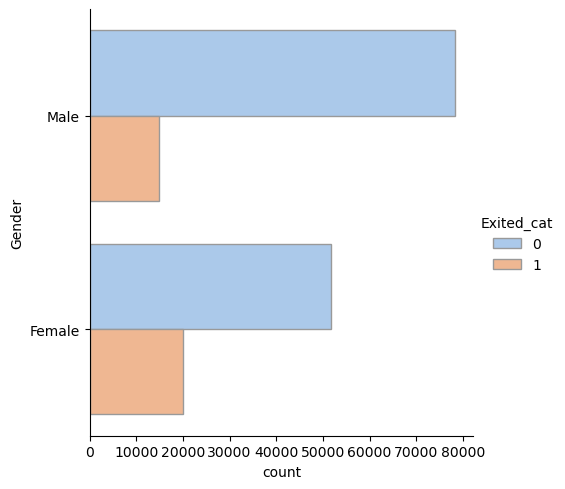

In [13]:
sns.catplot(y="Gender", hue="Exited_cat", kind="count",
            palette="pastel", edgecolor=".6",
            data=bank_train_data)

/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/pimawatmingkwan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Age', ylabel='Geography'>

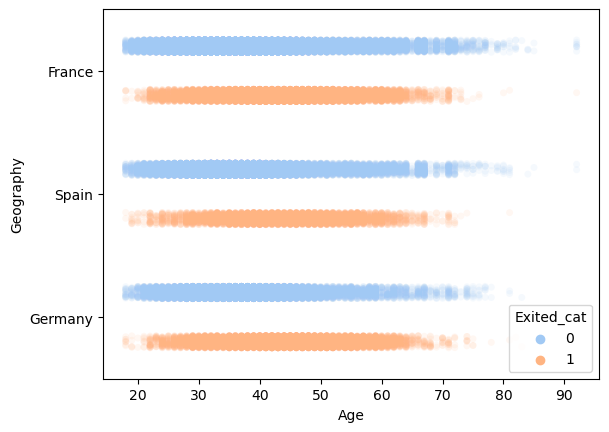

In [14]:
sns.stripplot(data=bank_train_data, x="Age", y="Geography", hue="Exited_cat", dodge=True,alpha=0.1,palette="pastel")

<Axes: xlabel='Exited_cat', ylabel='Age'>

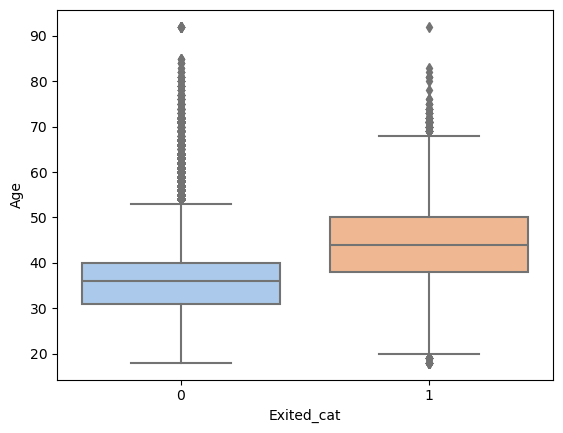

In [15]:
sns.boxplot(data=bank_train_data, x="Exited_cat", y="Age",palette="pastel")

<Axes: xlabel='Exited_cat', ylabel='EstimatedSalary'>

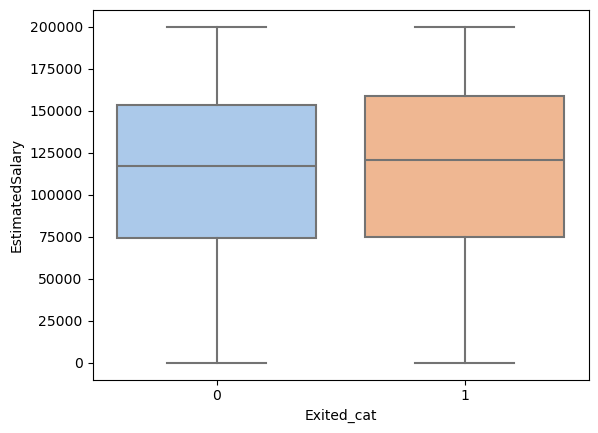

In [16]:
sns.boxplot(data=bank_train_data, x="Exited_cat", y="EstimatedSalary",palette="pastel")

<Axes: xlabel='Exited_cat', ylabel='CreditScore'>

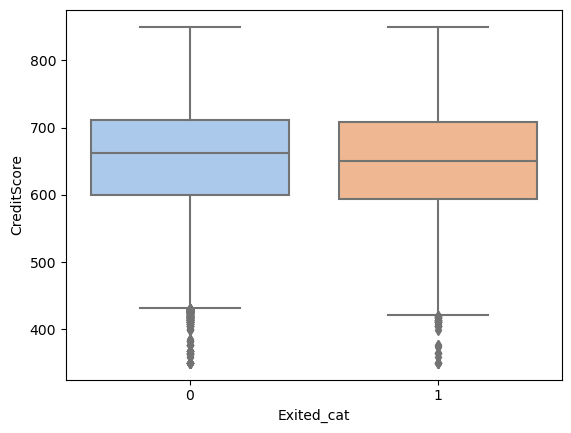

In [17]:
sns.boxplot(data=bank_train_data, x="Exited_cat", y="CreditScore",palette="pastel")

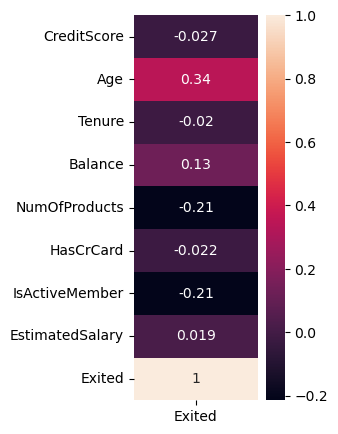

In [18]:
plt.figure(figsize=(2,5))
sns.heatmap(bank_train_data[num_col].corr()[['Exited']],annot = True)
plt.show()

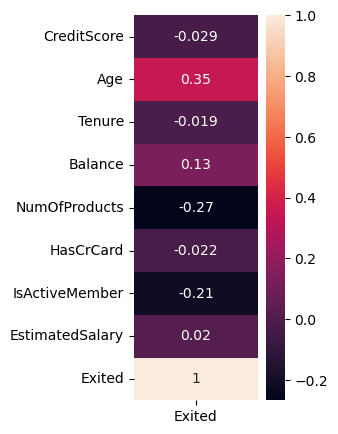

In [19]:
plt.figure(figsize=(2,5))
sns.heatmap(bank_train_data[num_col].corr(method='spearman')[['Exited']],annot = True)
plt.show()

# Process data

In [20]:
bank_train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_cat
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0


In [21]:
bank_train_data_proc = bank_train_data[:]

In [22]:
columns = ['Geography', 'Gender']
for i in columns:
    le = LabelEncoder()
    bank_train_data_proc[i] = le.fit_transform(bank_train_data_proc[i])
bank_train_data_proc.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_cat
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0


In [23]:
cols = ['CreditScore', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
bank_train_data_proc[cols] = scaler.fit_transform(bank_train_data_proc[cols])
bank_train_data_proc.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_cat
0,0,15674932,Okwudilichukwu,0.144135,0,1,33.0,3,-0.883163,2,1.0,0.0,1.369486,0,0
1,1,15749177,Okwudiliolisa,-0.367706,0,1,33.0,1,-0.883163,2,1.0,1.0,-1.254085,0,0
2,2,15694510,Hsueh,0.268974,0,1,40.0,10,-0.883163,2,1.0,0.0,1.437422,0,0
3,3,15741417,Kao,-0.941966,0,1,34.0,2,1.486918,1,1.0,1.0,-0.557018,0,0
4,4,15766172,Chiemenam,0.743362,2,1,33.0,5,-0.883163,2,1.0,1.0,-1.938770,0,0


In [24]:
X = bank_train_data_proc.drop(['CustomerId','id','Surname', 'Exited', 'HasCrCard','Exited_cat'], axis =1)
y = bank_train_data_proc['Exited']

# Sample split

In [25]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size =0.2, random_state = 3)

In [26]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
55855,0.481200,2,1,39.0,10,0.159878,1,0.0,-2.213658
25271,-1.341451,1,1,42.0,9,1.509947,1,1.0,0.655833
98908,1.829463,0,1,31.0,9,-0.883163,2,0.0,1.703910
89844,0.793298,0,0,38.0,10,-0.883163,2,1.0,-1.120343
147017,-1.691000,0,0,43.0,7,1.224074,2,0.0,-1.280775


# Train and evaluate model

In [27]:
abc = AdaBoostClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()

model_ls = [abc,gbdt,xgb,rf]

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26067
           1       0.74      0.52      0.61      6940

    accuracy                           0.86     33007
   macro avg       0.81      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007

--------------------------------------------------------
GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26067
           1       0.75      0.54      0.62      6940

    accuracy                           0.86     33007
   macro avg       0.82      0.74      0.77     33007
weighted avg       0.86      0.86      0.86     33007

--------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stop

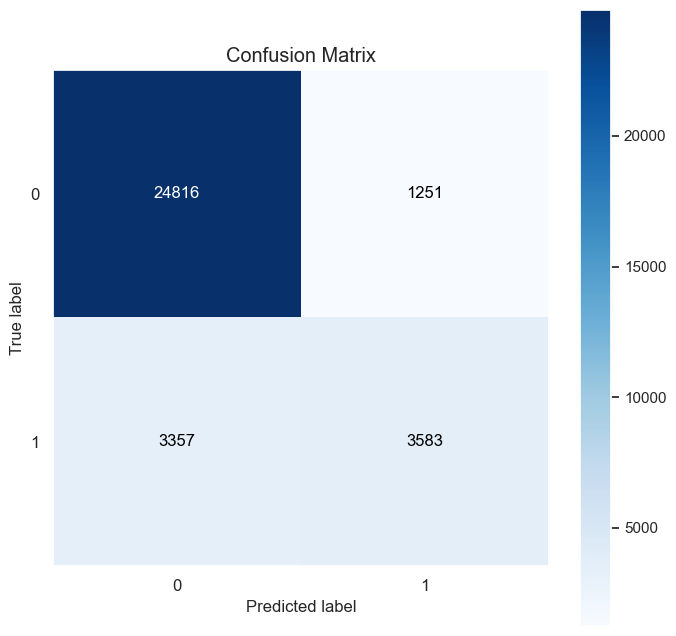

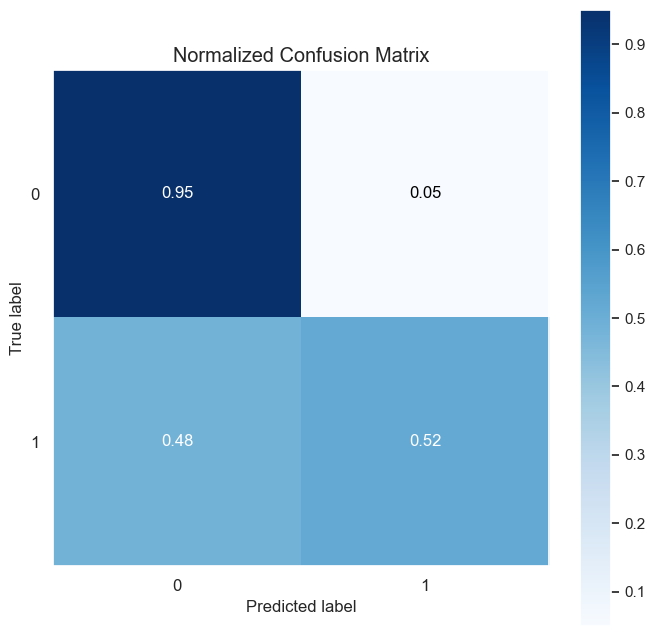

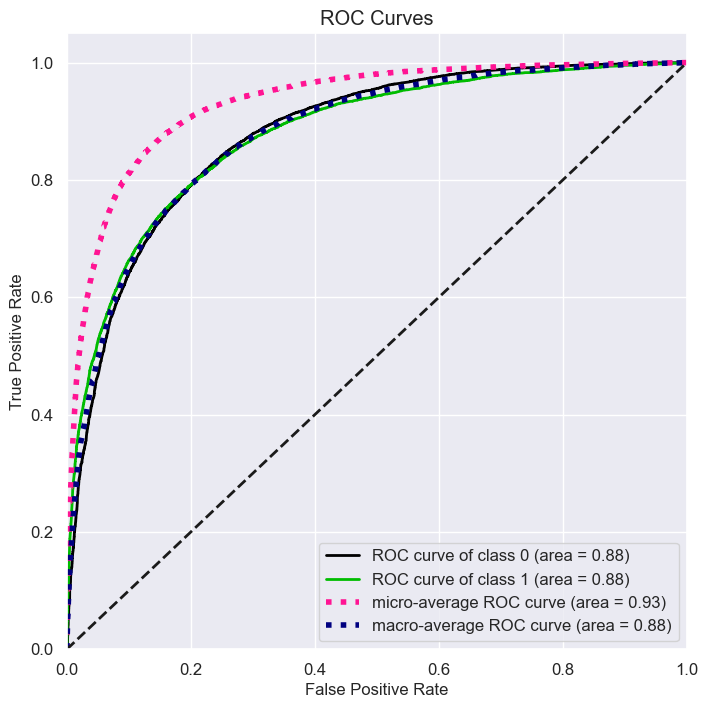

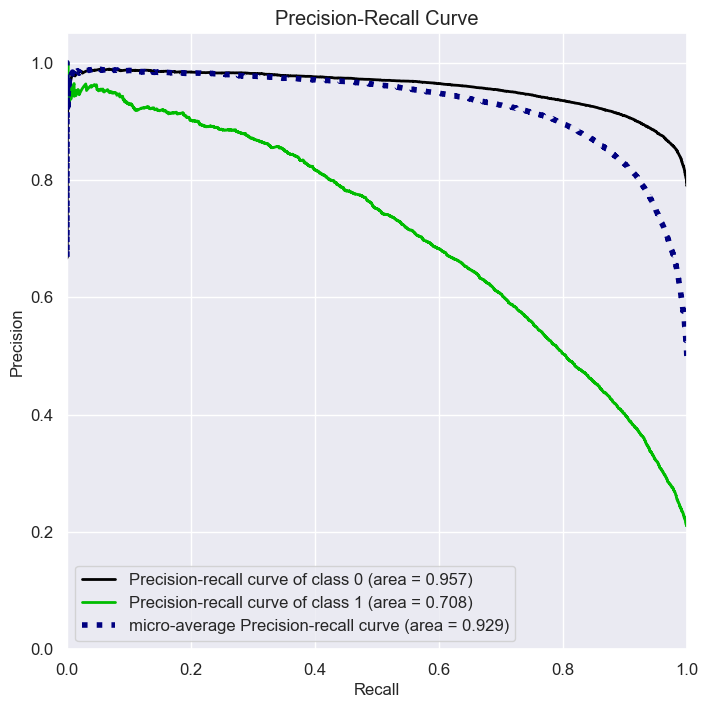

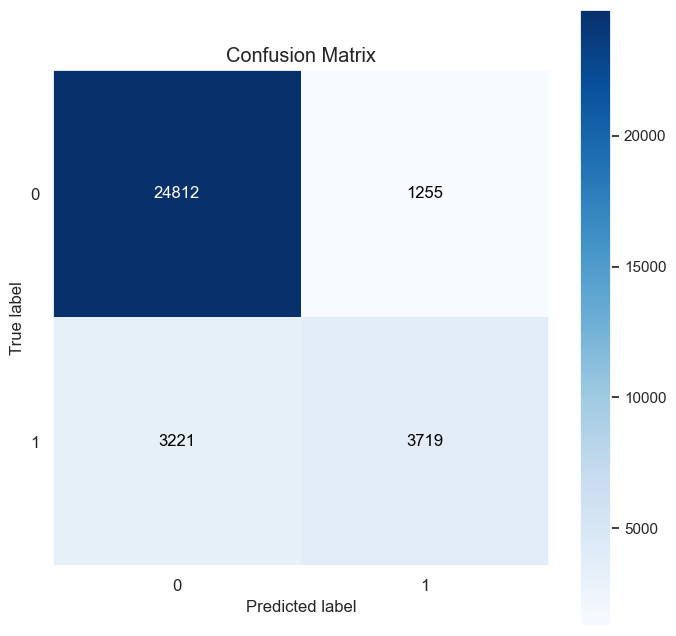

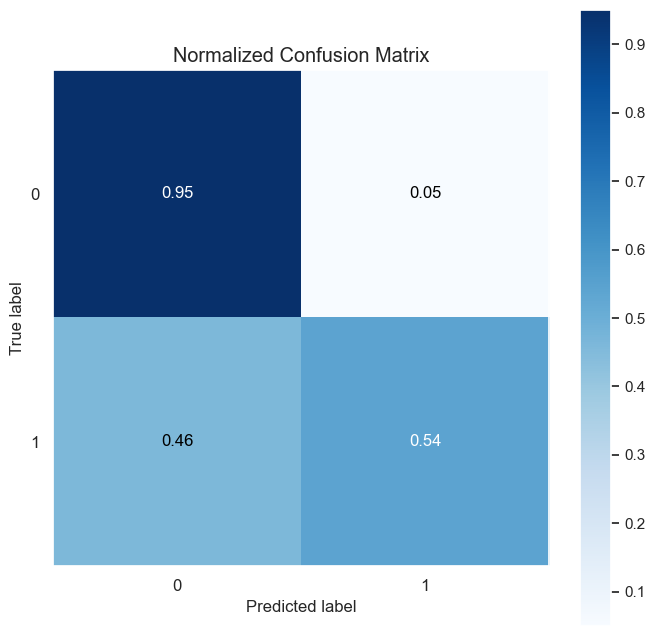

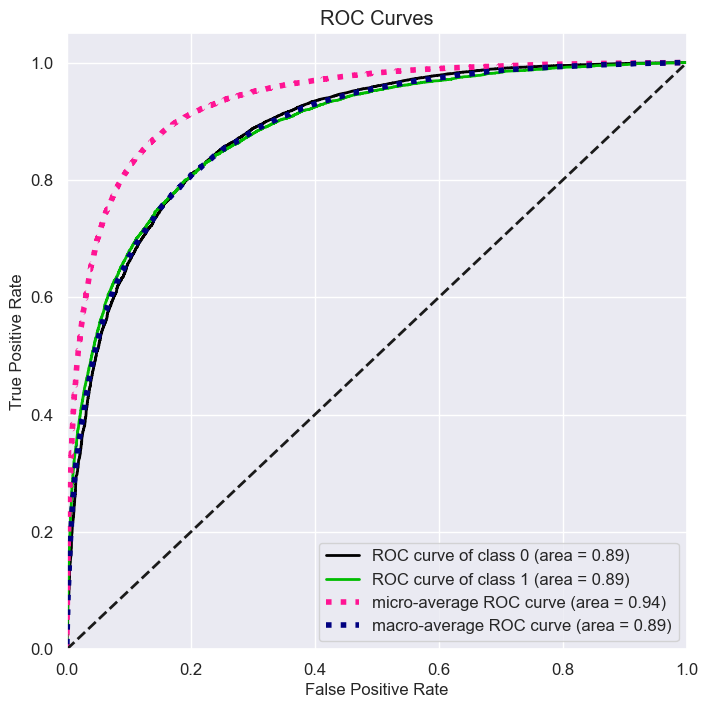

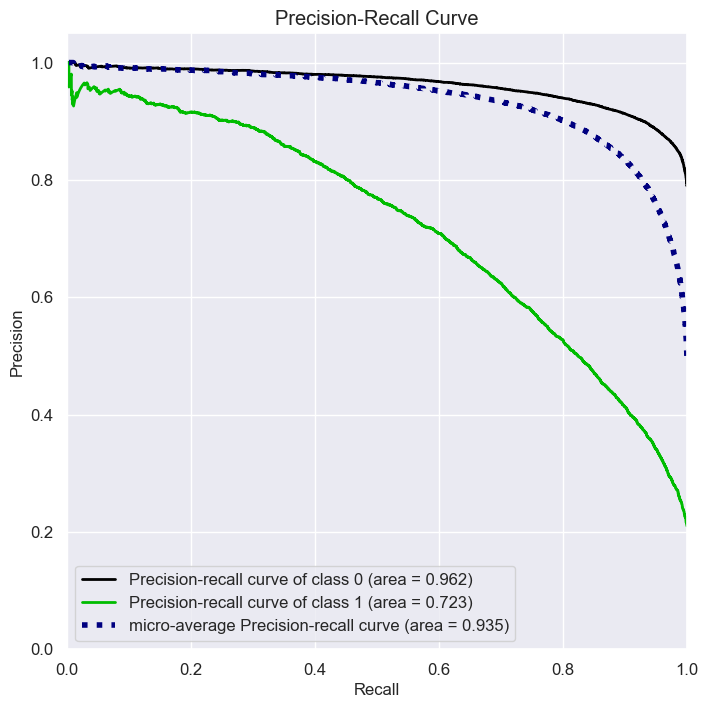

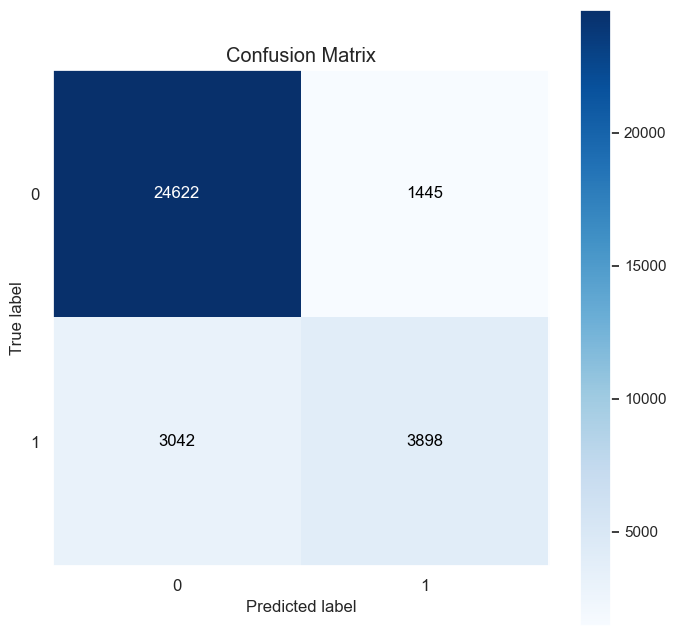

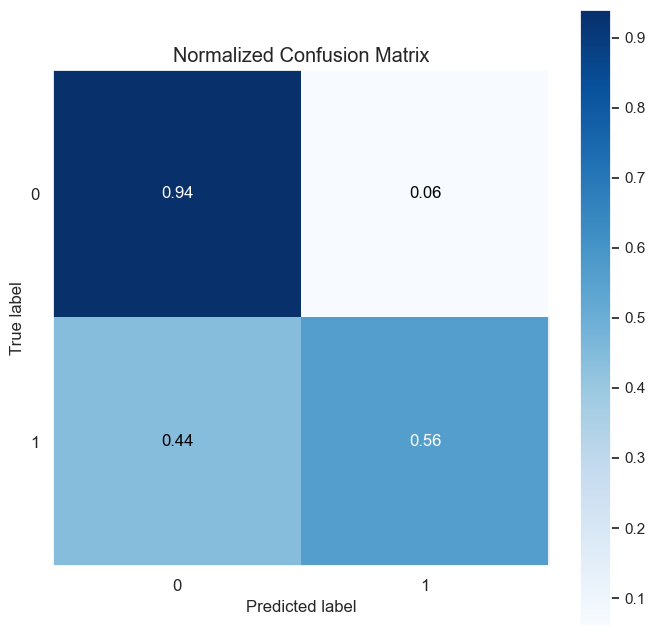

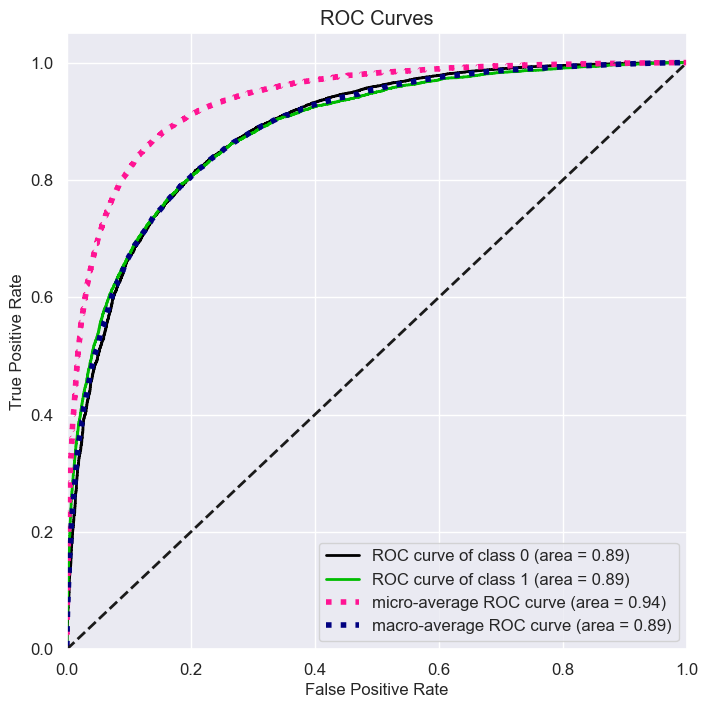

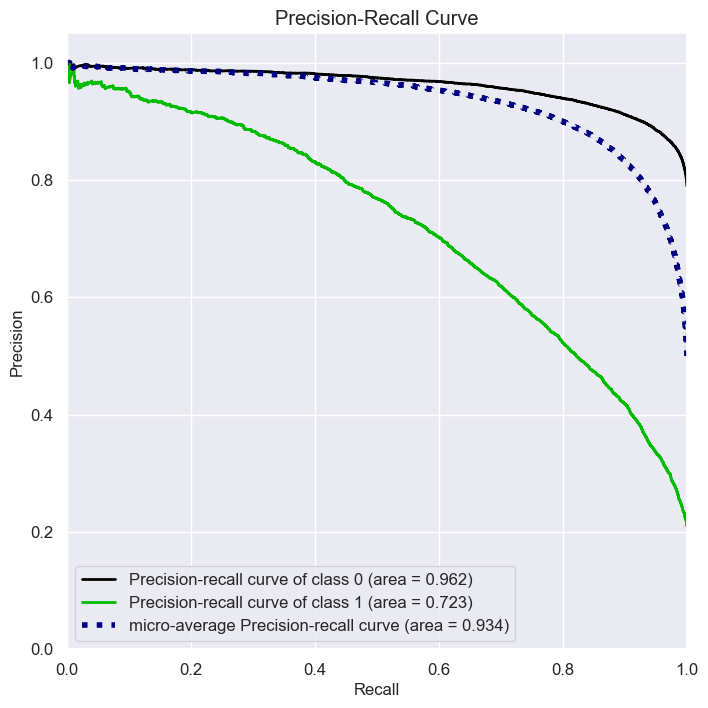

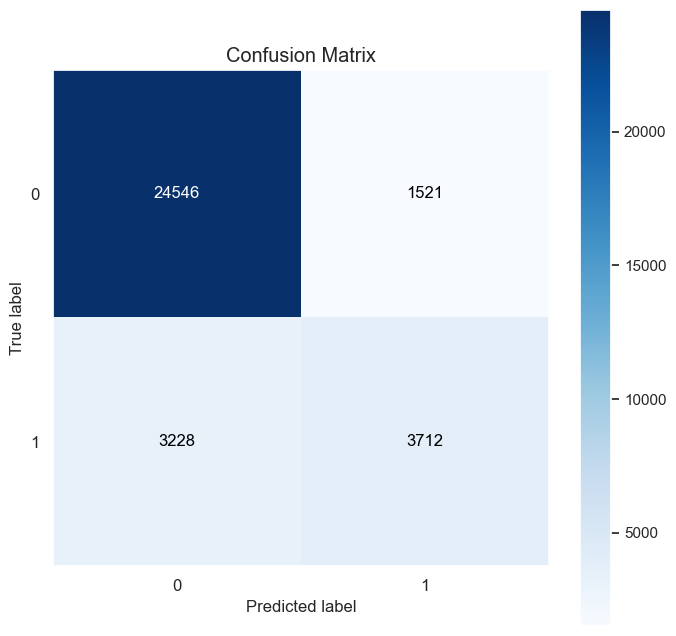

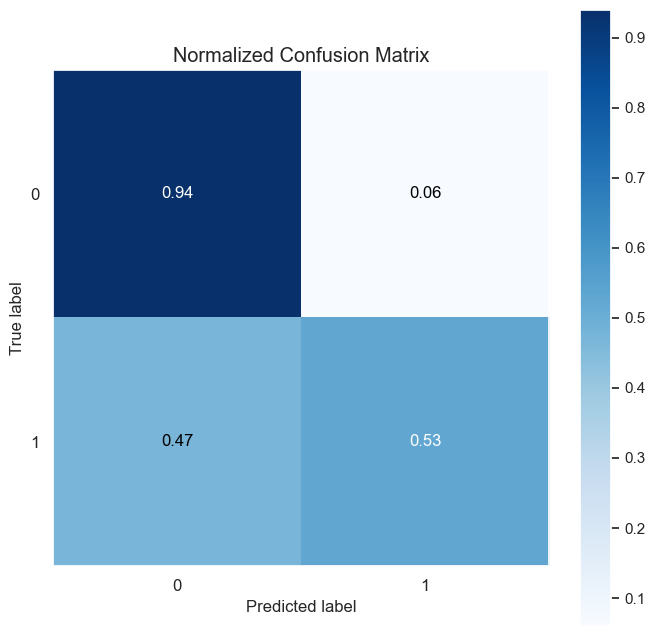

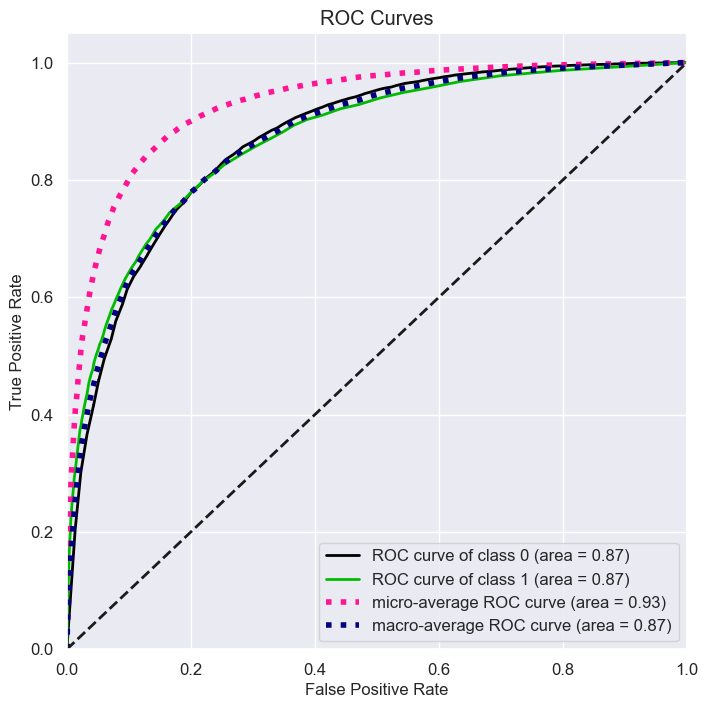

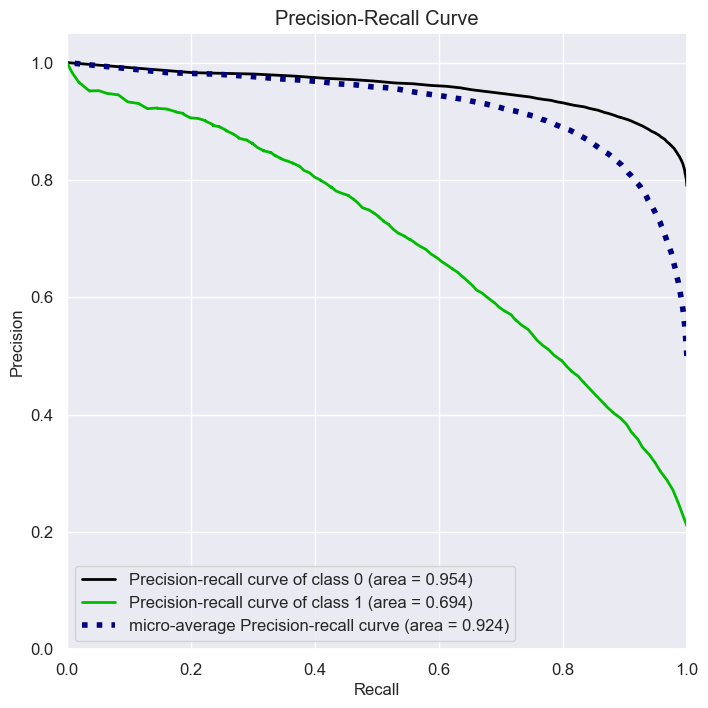

In [28]:
m_ls=['AdaBoost', 
    'GradientBoost',
    'XtremeGradientBoosting',
    'RandomForestClassifier']
acc_ls=[]
f1_ls=[]
confusion_matrix_ls=[]
roc_auc_ls=[]

for m in model_ls:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)
    
    accuracy = accuracy_score(y_val,y_pred)
    f1 = f1_score(y_val,y_pred)
    confusion_matrix =  cm(y_val,y_pred)
    roc_auc = roc_auc_score(y_val , y_pred)
    
    acc_ls.append(accuracy)
    f1_ls.append(f1)
    confusion_matrix_ls.append(confusion_matrix)
    roc_auc_ls.append(roc_auc)
    
    sns.set(rc={'figure.figsize':(8,8)})
    skplt.metrics.plot_confusion_matrix(y_val , y_pred)
    sns.set(rc={'figure.figsize':(8,8)})
    skplt.metrics.plot_confusion_matrix(y_val , y_pred, normalize=True)
    sns.set(rc={'figure.figsize':(8,8)})
    skplt.metrics.plot_roc(y_val, y_pred_prob)
    sns.set(rc={'figure.figsize':(8,8)})
    skplt.metrics.plot_precision_recall(y_val, y_pred_prob)
    
    print(m)
    print(classification_report(y_val, y_pred))
    print('--------------------------------------------------------')


In [29]:
for i in range(len(m_ls)):
    print(m_ls[i])
    print(confusion_matrix_ls[i])
    print('---------------------------------')

AdaBoost
[[24816  1251]
 [ 3357  3583]]
---------------------------------
GradientBoost
[[24812  1255]
 [ 3221  3719]]
---------------------------------
XtremeGradientBoosting
[[24622  1445]
 [ 3042  3898]]
---------------------------------
RandomForestClassifier
[[24546  1521]
 [ 3228  3712]]
---------------------------------


In [30]:
eval_df = pd.DataFrame(
    {'model': m_ls,
     'accuracy': acc_ls,
     'f1': f1_ls,
     'roc_auc': roc_auc_ls
    })

eval_df

,model,accuracy,f1,roc_auc
0,AdaBoost,0.860393,0.608629,0.734145
1,GradientBoost,0.864392,0.624308,0.743867
2,XtremeGradientBoosting,0.864059,0.634698,0.753119
3,RandomForestClassifier,0.856121,0.609874,0.738260


# Tuning parameter

In [31]:
xgb_p = XGBClassifier()

In [32]:
param = {"subsample":[0.75, 1],
                "colsample_bytree":[0.75, 1],
                "max_depth":[2, 6, 10, 20],
                "min_child_weight":[1, 5, 10],
                "learning_rate":[0.1, 0.01]}

In [33]:
model = GridSearchCV(estimator=xgb_p,
                      param_grid=param,
                      cv=3,
                      scoring="neg_log_loss")

In [34]:
model.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [0.1, 0.01],
                         'max_depth': [2, 6, 10, 20],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.75, 1]},
             scoring='neg_log_loss')

In [35]:
best_params_xgb = model.best_params_
best_estimator_xgb = model.best_estimator_

In [36]:
best_params_xgb

{'colsample_bytree': 0.75,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 10,
 'subsample': 1}

In [37]:
best_estimator_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred_xgb = best_estimator_xgb.predict(X_val)

In [39]:
accuracy = accuracy_score(y_val,y_pred_xgb)
f1 = f1_score(y_val,y_pred_xgb)
confusion_matrix =  cm(y_val,y_pred_xgb)
roc_auc = roc_auc_score(y_val , y_pred_xgb)

In [40]:
accuracy

0.8649377404792923

In [41]:
f1

0.6333881578947369

In [42]:
confusion_matrix

array([[24698,  1369],
       [ 3089,  3851]])

In [43]:
roc_auc

0.7511903127266037

# Prepare test dataset

In [44]:
bank_test_data_proc = bank_test_data[:]

In [45]:
for i in columns:
    bank_test_data_proc[i] = le.fit_transform(bank_test_data_proc[i])
bank_test_data_proc.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


In [46]:
bank_test_data_proc[cols] = scaler.fit_transform(bank_test_data_proc[cols])
bank_test_data_proc.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,-0.878176,0,0,23.0,2,-0.881274,2,0.0,1.0,0.967874
1,165035,15782418,Nott,0.329567,0,0,46.0,2,-0.881274,1,1.0,0.0,-0.790939
2,165036,15807120,K?,-0.006609,0,0,34.0,7,-0.881274,2,1.0,0.0,0.528413
3,165037,15808905,O'Donnell,0.304665,0,1,36.0,8,-0.881274,1,1.0,0.0,0.032150
4,165038,15607314,Higgins,1.188684,1,1,38.0,10,1.050038,1,1.0,0.0,0.539331


In [47]:
bank_test_data_proc = bank_test_data_proc.drop(['CustomerId','id','Surname','HasCrCard'], axis =1)

In [48]:
bank_test_data_proc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,-0.878176,0,0,23.0,2,-0.881274,2,1.0,0.967874
1,0.329567,0,0,46.0,2,-0.881274,1,0.0,-0.790939
2,-0.006609,0,0,34.0,7,-0.881274,2,0.0,0.528413
3,0.304665,0,1,36.0,8,-0.881274,1,0.0,0.032150
4,1.188684,1,1,38.0,10,1.050038,1,0.0,0.539331


# Predict test dataset

In [54]:
pred_test = best_estimator_xgb.predict(bank_test_data_proc)

In [55]:
pred_result = pd.DataFrame({'id': bank_test_data['id'], 
                   'Exited': pred_test})

In [56]:
pred_result.head(10)

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
5,165039,0
6,165040,0
7,165041,0
8,165042,1
9,165043,0


In [57]:
sample_sub.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [58]:
pred_result.to_csv('submission.csv', index=False)